# CAR ACCIDENT SEVERITY

## 1. Methodology

### 1.1. Exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read data
df = pd.read_csv('Data-Collisions.csv')
df.head()

/home/kien/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


SEVERITYCODE           X          Y  OBJECTID  INCKEY  COLDETKEY REPORTNO  \
0             2 -122.323148  47.703140         1    1307       1307  3502005   
1             1 -122.347294  47.647172         2   52200      52200  2607959   
2             1 -122.334540  47.607871         3   26700      26700  1482393   
3             1 -122.334803  47.604803         4    1144       1144  3503937   
4             2 -122.306426  47.545739         5   17700      17700  1807429   

    STATUS      ADDRTYPE   INTKEY  ... ROADCOND                LIGHTCOND  \
0  Matched  Intersection  37475.0  ...      Wet                 Daylight   
1  Matched         Block      NaN  ...      Wet  Dark - Street Lights On   
2  Matched         Block      NaN  ...      Dry                 Daylight   
3  Matched         Block      NaN  ...      Dry                 Daylight   
4  Matched  Intersection  34387.0  ...      Wet                 Daylight   

  PEDROWNOTGRNT  SDOTCOLNUM SPEEDING ST_COLCODE  \
0           NaN         NaN      NaN         10   
1           NaN   6354039.0      NaN         11   
2           NaN   4323031.0      NaN         32   
3           NaN         NaN      NaN         23   
4           NaN   4028032.0      NaN         10   

                                          ST_COLDESC  SEGLANEKEY  \
0                                  Entering at angle           0   
1  From same direction - both going straight - bo...           0   
2                             One parked--one moving           0   
3                   From same direction - all others           0   
4                                  Entering at angle           0   

   CROSSWALKKEY  HITPARKEDCAR  
0             0             N  
1             0             N  
2             0             N  
3             0             N  
4             0             N  

[5 rows x 38 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

**Note**: *We can see that there are one duplicate column "SEVERITYCODE". The missing data includes the following columns (less than 194673 rows): "X", "Y", "ADDRTYPE", "INTKEY", "LOCATION", "EXCEPTRSNCODE", "EXCEPTRSNDESC", "COLLISIONTYPE", "JUNCTIONTYPE", "INATTENTIONIND", "UNDERINFL", "WEATHER", "ROADCOND", "LIGHTCOND", "PEDROWNOTGRNT", "SDOTCOLNUM", "SPEEDING", "ST_COLCODE" and "ST_COLDESC"*

In [4]:
df.drop(['SEVERITYCODE.1'], axis=1, inplace=True)
len(df.columns)

37

As the expert knowledge, the "severity" depends on the following data:
<ul>
    <li>Accident location: Latitude("Y" column - float), Longitude("X" column - float)</li>
    <li>Road coditions: "ROADCOND" column - text</li>
    <li>Weather condition: "WEATHER" column - text</li>
    <li>Junction: "JUNCTIONTYPE" column - text</li>
    <li>Car speeding: "SPEEDING" column - boolean</li>
    <li>Number of people involved: "PERSONCOUNT" column - integer</li>
    <li>Light conditions: "LIGHTCOND" column - text</li>
    <li>Number of vehicles involved in: "VEHCOUNT" column - integer</li>
    <li>The date time when the accident occurs: "INCDATE", "INCDTTM" columns - text</li>
</ul>

**The problem is predicting the severity code by using the independent variables. It is a classification problem.**

At the end of this section, we just see the data and data type. We also split the data to input data and output data and see if there is missing data. We will do the data visualization and statistics in the next section.

### 1.2. Data visualization and statistics

In [5]:
df['SEVERITYCODE'].value_counts(normalize=True)

1    0.701099
2    0.298901
Name: SEVERITYCODE, dtype: float64

We can see that the dataset contains only 2 severities: "1" (prop damage) and "2" (injury). It will limit the prediction because the classification can not perform with the label which doesn't exist in dataset such as "3" (fatality), "2b" (serious injury) and "0" (unknown).

We can use the Folium library to see the collision distribution on the map.

In [6]:
import folium
seattle_map = folium.Map(location=[47.608013, -122.335167], zoom_start=12)
accidents = folium.map.FeatureGroup()

for lat,lng in zip(df['Y'].dropna().head(1000), df['X'].dropna().head(1000)):
    accidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
seattle_map.add_child(accidents)
seattle_map

The dataset is large to load all the data into map, so, I choose first 1000 points to display on the map. It seems that the Seattle Center have higher number of accidents.

**Drop the missing value in longtitude and latitude**

In [7]:
df.dropna(subset=['X', 'Y'], inplace=True)

In [8]:
df[['X', 'Y', 'ROADCOND', 'WEATHER', 'JUNCTIONTYPE', 'SPEEDING', 'PERSONCOUNT', 'LIGHTCOND', 'VEHCOUNT', 'SEVERITYCODE']].isna().sum()

X                    0
Y                    0
ROADCOND          4858
WEATHER           4925
JUNCTIONTYPE      4193
SPEEDING        180619
PERSONCOUNT          0
LIGHTCOND         5012
VEHCOUNT             0
SEVERITYCODE         0
dtype: int64

In [9]:
df['SPEEDING'].value_counts()

Y    8720
Name: SPEEDING, dtype: int64

**The speed is "Y" if the accident relates to car speed. Then we fill the missing value with 0 and 'Y' by 1.**

In [10]:
df['SPEEDING'].replace([np.NaN, 'Y'], [0, 1], inplace=True)
df['SPEEDING'].value_counts()

0    180619
1      8720
Name: SPEEDING, dtype: int64

**The remain missing point is very small with total data, so we can drop all the missing data**

In [11]:
df.dropna(subset=['X', 'Y', 'ROADCOND', 'WEATHER', 'JUNCTIONTYPE', 'SPEEDING', 'PERSONCOUNT', 'LIGHTCOND', 'VEHCOUNT', 'SEVERITYCODE'], inplace=True)
len(df)

180086

**We see the value count of SEVERITY after drop missing data**

In [12]:
df['SEVERITYCODE'].value_counts(normalize=True)

1    0.690026
2    0.309974
Name: SEVERITYCODE, dtype: float64

**Do the statistics in "ROADCOND"**

[]

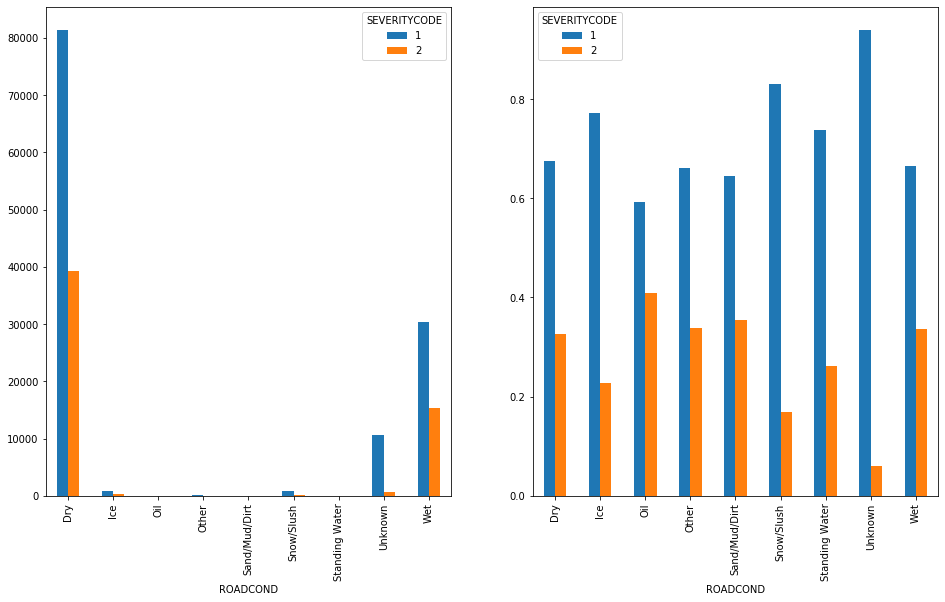

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(16,9))
df.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts().unstack().plot(kind='bar', ax=axes[0])
df.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True).unstack().plot(kind='bar', ax=axes[1])
plt.plot()

*We can conclude that almost data in the road condition set (Dry, Wet, Unknown) and when an accident occurs, the probability of severity "1" is more than the probability severity "2". But we can not say the impact of road condition on the probability.*

**Do the statistics in "WEATHER"**

[]

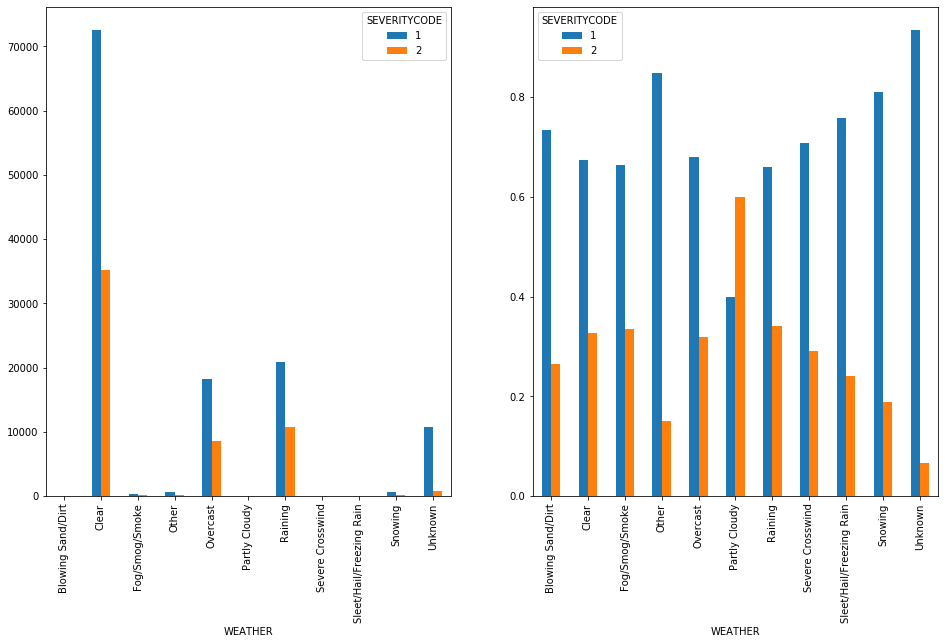

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(16,9))
df.groupby(['WEATHER'])['SEVERITYCODE'].value_counts().unstack().plot(kind='bar', ax=axes[0])
df.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True).unstack().plot(kind='bar', ax=axes[1])
plt.plot()

*We see that the almost weather data is in the set (Clear, Overcast, Raining, Unknown) and when the weather is partly cloudy, the severity of accident is higher.*

**Do the statistics in "JUNCTIONTYPE"**

[]

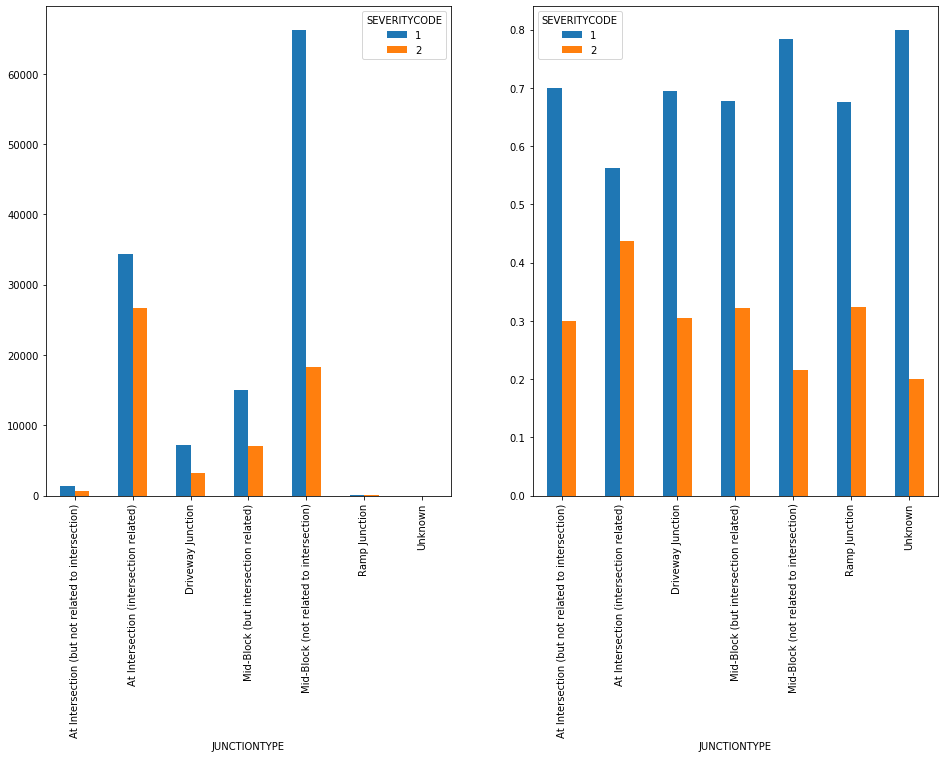

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(16,9))
df.groupby(['JUNCTIONTYPE'])['SEVERITYCODE'].value_counts().unstack().plot(kind='bar', ax=axes[0])
df.groupby(['JUNCTIONTYPE'])['SEVERITYCODE'].value_counts(normalize=True).unstack().plot(kind='bar', ax=axes[1])
plt.plot()

*Almost junction type data is in the set (At intersection, driveway junction, mid-block). When the accident occurs at intersection (intersection related), so, the higher probability the accident is more dangerous.*

**Do the statistics in  "SPEEDING"**

[]

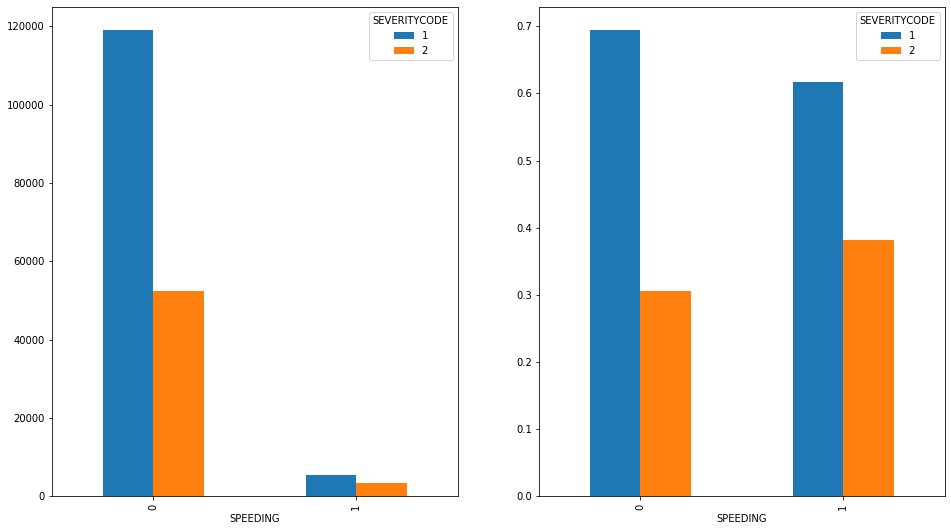

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(16,9))
df.groupby(['SPEEDING'])['SEVERITYCODE'].value_counts().unstack().plot(kind='bar', ax=axes[0])
df.groupby(['SPEEDING'])['SEVERITYCODE'].value_counts(normalize=True).unstack().plot(kind='bar', ax=axes[1])
plt.plot()

*Almost accidents does not relates to speed, but when the accident concerns about speed, it will have higher severity*

**Do the statistics in "LIGHTCOND"**

[]

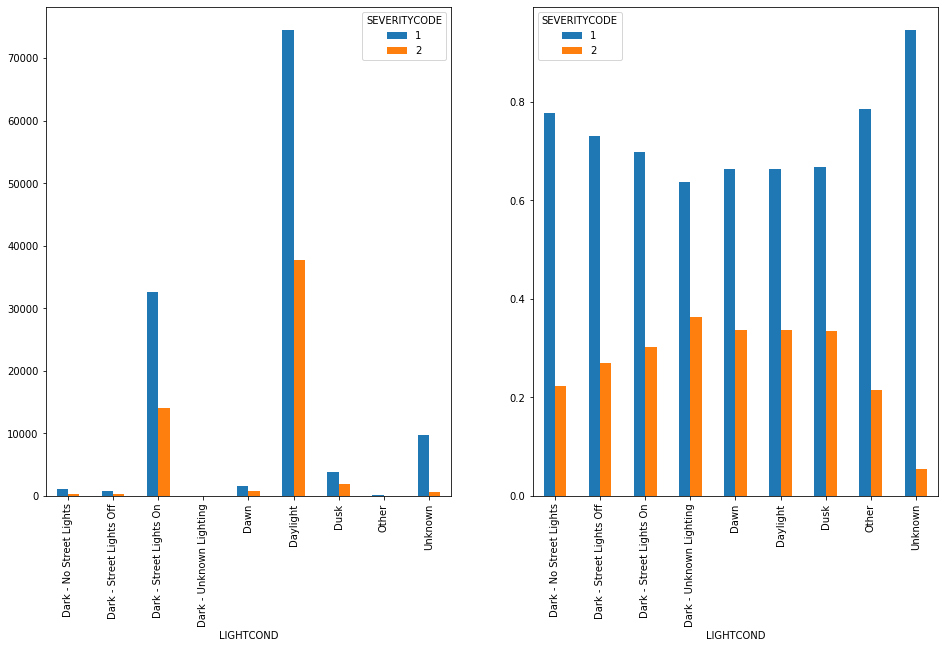

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(16,9))
df.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts().unstack().plot(kind='bar', ax=axes[0])
df.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize=True).unstack().plot(kind='bar', ax=axes[1])
plt.plot()

*Almost the accidents occur when the light is normal (Street lights On and Daylight)*

**Do the statistics in "PERSONCOUNT"**

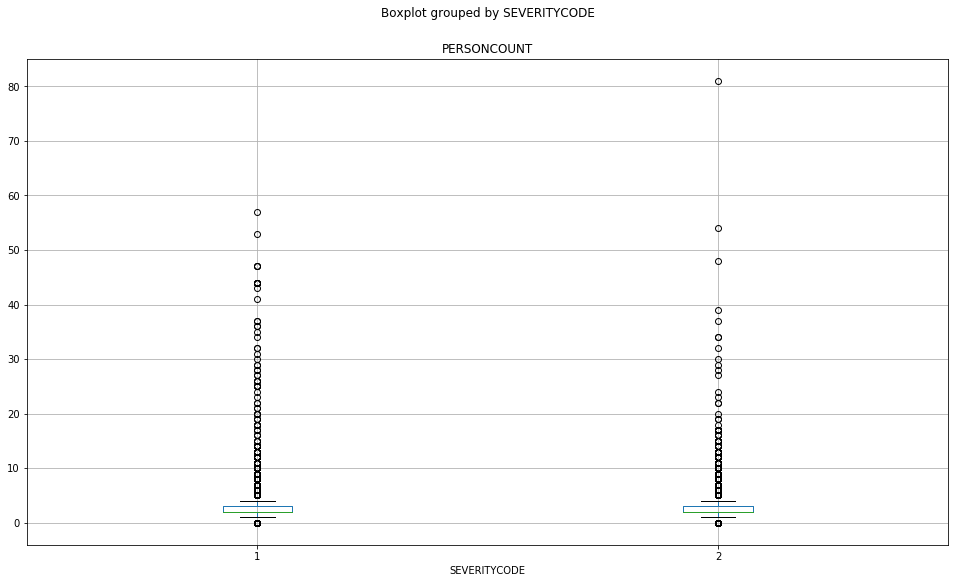

In [18]:
df.boxplot('PERSONCOUNT', by='SEVERITYCODE', figsize=(16,9))

**Do the statistics in "VEHCOUNT"**

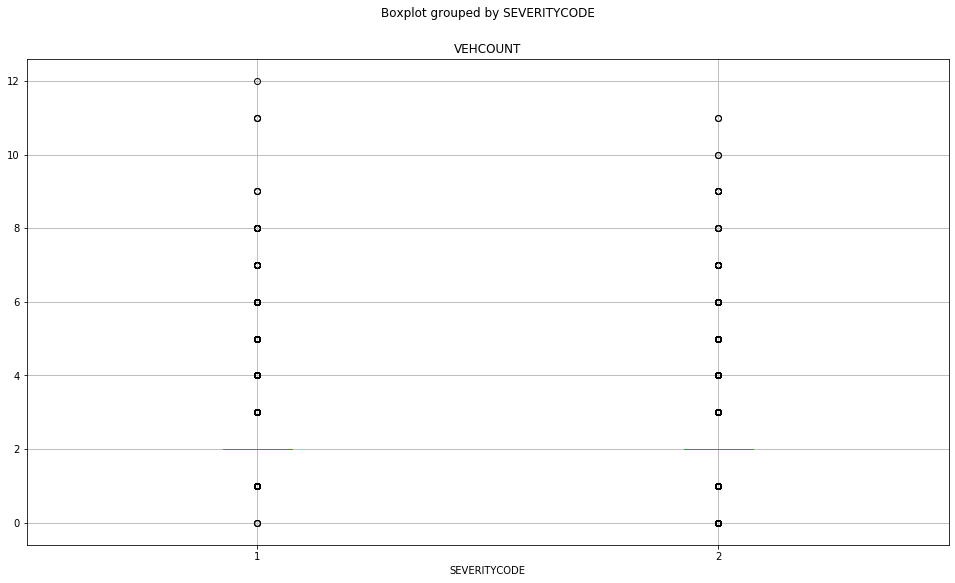

In [19]:
df.boxplot('VEHCOUNT', by='SEVERITYCODE', figsize=(16,9))

*The person count and vehicle count are nearly the same and they can't be a good prediction.*

**Do the statistics in date time**

In [20]:
df[['INCDATE', 'INCDTTM']].head()

INCDATE                 INCDTTM
0  2013/03/27 00:00:00+00    3/27/2013 2:54:00 PM
1  2006/12/20 00:00:00+00   12/20/2006 6:55:00 PM
2  2004/11/18 00:00:00+00  11/18/2004 10:20:00 AM
3  2013/03/29 00:00:00+00    3/29/2013 9:26:00 AM
4  2004/01/28 00:00:00+00    1/28/2004 8:04:00 AM

In [21]:
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])

In [22]:
df[['INCDATE', 'INCDTTM']].head()

INCDATE             INCDTTM
0  2013/03/27 00:00:00+00 2013-03-27 14:54:00
1  2006/12/20 00:00:00+00 2006-12-20 18:55:00
2  2004/11/18 00:00:00+00 2004-11-18 10:20:00
3  2013/03/29 00:00:00+00 2013-03-29 09:26:00
4  2004/01/28 00:00:00+00 2004-01-28 08:04:00

In [23]:
df['dayofweek'] = df['INCDTTM'].dt.dayofweek
df['hourofday'] = df['INCDTTM'].dt.hour

In [24]:
df[['dayofweek', 'hourofday']].head()

dayofweek  hourofday
0          2         14
1          2         18
2          3         10
3          4          9
4          2          8

[]

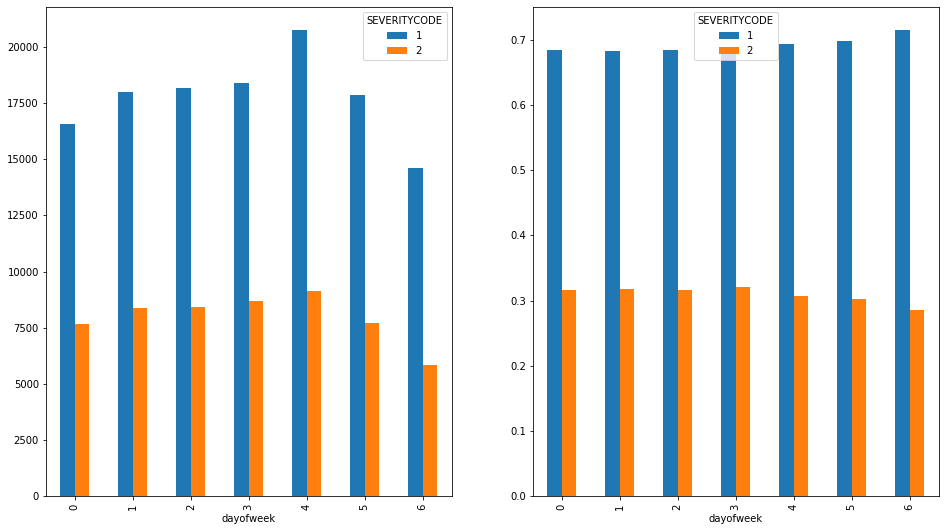

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(16,9))
df.groupby(['dayofweek'])['SEVERITYCODE'].value_counts().unstack().plot(kind='bar', ax=axes[0])
df.groupby(['dayofweek'])['SEVERITYCODE'].value_counts(normalize=True).unstack().plot(kind='bar', ax=axes[1])
plt.plot()

*The number of accidents is greatest at Friday and at least in Sunday and the proportion of severity does not depend on the day.*

[]

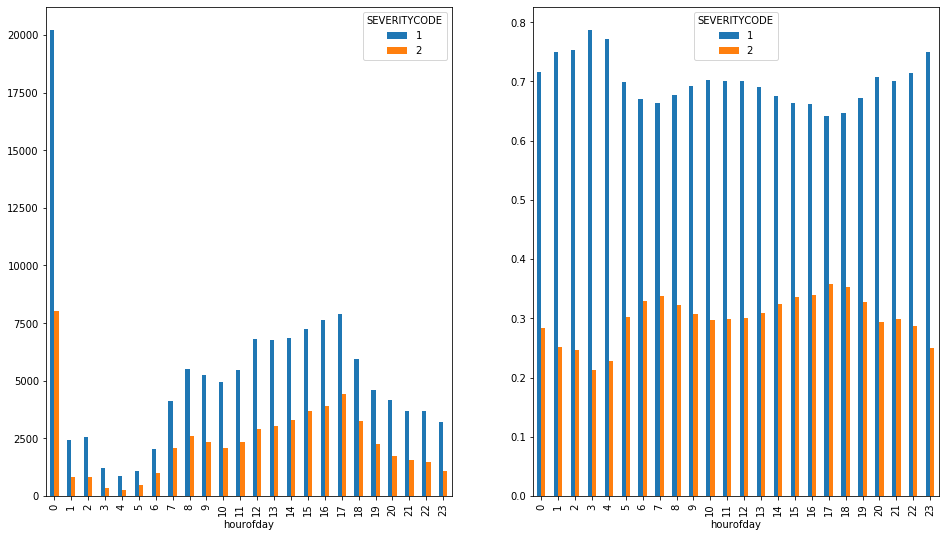

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(16,9))
df.groupby(['hourofday'])['SEVERITYCODE'].value_counts().unstack().plot(kind='bar', ax=axes[0])
df.groupby(['hourofday'])['SEVERITYCODE'].value_counts(normalize=True).unstack().plot(kind='bar', ax=axes[1])
plt.plot()

*Interesting, there are a lot of accidents in mid-night. Related to the day analysis, it seems that people in Seattle has a lot of activities at Friday night and it causes accidents when they come home.*

### 1.3 Data preparation

**Encode the categorical data**

In [27]:
df['ROADCOND'].value_counts()

Dry               120635
Wet                45607
Unknown            11386
Ice                 1162
Snow/Slush           971
Other                115
Standing Water        99
Sand/Mud/Dirt         62
Oil                   49
Name: ROADCOND, dtype: int64

In [28]:
encoding_road_cond = {
    'ROADCOND': {
        'Dry': 1,
        'Wet': 2,
        'Unknown': 0,
        'Ice': 3,
        'Snow/Slush': 4,
        'Other': 0,
        'Standing Water': 5,
        'Sand/Mud/Dirt': 6,
        'Oil': 7
    }
}
df.replace(encoding_road_cond, inplace=True)
df['ROADCOND'].value_counts()

1    120635
2     45607
0     11501
3      1162
4       971
5        99
6        62
7        49
Name: ROADCOND, dtype: int64

In [29]:
df['WEATHER'].value_counts()

Clear                       107698
Raining                      31726
Overcast                     26815
Unknown                      11505
Snowing                        875
Other                          728
Fog/Smog/Smoke                 549
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               49
Severe Crosswind                24
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [30]:
encoding_weather = {
    'WEATHER': {
        'Clear': 1,
        'Raining': 2,
        'Overcast': 3,
        'Unknown': 0,
        'Snowing': 4,
        'Other': 0,
        'Fog/Smog/Smoke': 5,
        'Sleet/Hail/Freezing Rain': 6,
        'Blowing Sand/Dirt': 7,
        'Severe Crosswind': 8,
        'Partly Cloudy': 9
    }
}
df.replace(encoding_weather, inplace=True)
df['WEATHER'].value_counts()

1    107698
2     31726
3     26815
0     12233
4       875
5       549
6       112
7        49
8        24
9         5
Name: WEATHER, dtype: int64

In [31]:
df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              84517
At Intersection (intersection related)               60930
Mid-Block (but intersection related)                 22035
Driveway Junction                                    10430
At Intersection (but not related to intersection)     2030
Ramp Junction                                          139
Unknown                                                  5
Name: JUNCTIONTYPE, dtype: int64

In [32]:
encoding_junction = {
    'JUNCTIONTYPE': {
        'Mid-Block (not related to intersection)': 1,
        'At Intersection (intersection related)': 2,
        'Mid-Block (but intersection related)': 3,
        'Driveway Junction': 4,
        'At Intersection (but not related to intersection)': 5,
        'Ramp Junction': 6,
        'Unknown': 0
    }
}
df.replace(encoding_junction, inplace=True)
df['JUNCTIONTYPE'].value_counts()

1    84517
2    60930
3    22035
4    10430
5     2030
6      139
0        5
Name: JUNCTIONTYPE, dtype: int64

In [33]:
df['LIGHTCOND'].value_counts()

Daylight                    112229
Dark - Street Lights On      46686
Unknown                      10340
Dusk                          5709
Dawn                          2390
Dark - No Street Lights       1419
Dark - Street Lights Off      1130
Other                          172
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [34]:
encoding_light_cond = {
    'LIGHTCOND': {
        'Daylight': 1,
        'Dark - Street Lights On': 2,
        'Unknown': 0,
        'Dusk': 3,
        'Dawn': 4,
        'Dark - No Street Lights': 5,
        'Dark - Street Lights Off': 6,
        'Other': 0,
        'Dark - Unknown Lighting': 7
    }
}
df.replace(encoding_light_cond, inplace=True)
df['LIGHTCOND'].value_counts()

1    112229
2     46686
0     10512
3      5709
4      2390
5      1419
6      1130
7        11
Name: LIGHTCOND, dtype: int64

**Separate the dependent variable and independent variables**

In [35]:
X = df[['X', 'Y', 'ROADCOND', 'WEATHER', 'JUNCTIONTYPE', 'SPEEDING', 'LIGHTCOND', 'VEHCOUNT', 'PERSONCOUNT', 'dayofweek', 'hourofday']].copy()
Y = df['SEVERITYCODE'].copy()
Y.value_counts(normalize=True)

1    0.690026
2    0.309974
Name: SEVERITYCODE, dtype: float64

**The data is imbalanced, so, balance the dataset**

In [36]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler() 
X_rus, y_rus = rus.fit_sample(X, Y)
print("Remove number of rows: ", len(X) - len(X_rus))
y_rus.value_counts()

Remove number of rows:  68442


2    55822
1    55822
Name: SEVERITYCODE, dtype: int64

## 2. Build model##

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.2, random_state=4)

### 2.1. K Nearest Neighbor (KNN)

In [38]:
# Best k
from sklearn.neighbors import KNeighborsClassifier
Ks=15
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.59608581, 0.58923373, 0.61310404, 0.61023781, 0.62479287,
       0.61735859, 0.62515115, 0.62300148, 0.6306149 , 0.62940571,
       0.63482467, 0.63137624, 0.63675041, 0.63316763])

In [39]:
k = 13
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(n_neighbors=13)

### 2.2. Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
DT_model.fit(X_train,y_train)
DT_model

DecisionTreeClassifier(criterion='entropy', max_depth=6)

### 2.3. Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01).fit(X_train,y_train)
LR_model

/home/kien/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=0.01)

### 2.4. Validate

In [42]:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

In [43]:
knn_yhat = kNN_model.predict(X_test)
print("KNN F1-score: %.2f" % f1_score(y_test, knn_yhat, average='weighted'))
print("KNN jaccard-score: %.2f" %jaccard_score(y_test, knn_yhat))

KNN F1-score: 0.64
KNN jaccard-score: 0.47


In [44]:
DT_yhat = DT_model.predict(X_test)
print("DT F1-score: %.2f" % f1_score(y_test, DT_yhat, average='weighted'))
print("DT jaccard-score: %.2f" %jaccard_score(y_test, DT_yhat))

DT F1-score: 0.67
DT jaccard-score: 0.51


In [45]:
LR_yhat = LR_model.predict(X_test)
LR_yhat_prob = LR_model.predict_proba(X_test)
print("LR F1-score: %.2f" % f1_score(y_test, LR_yhat, average='weighted'))
print("LR jaccard-score: %.2f" %jaccard_score(y_test, LR_yhat))

LR F1-score: 0.62
LR jaccard-score: 0.47
